####  Data ingestion

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os


Loading Data 

In [2]:
url = 'https://raw.githubusercontent.com/cheryvmak/Dataset-Repo/refs/heads/main/Data_files/home_loan_train.csv'
train_data = pd.read_csv(url)
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Preliminary Data Analysis (EDA)

In [3]:
# copy and Read in data
df1 = train_data.copy()

# Inspect dataset
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# Lets check our data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
# Lets take a snap shot of our data
print(f"Rows: {df1.shape[0]:,}")
print(f"Columns: {df1.shape[1]}")

Rows: 614
Columns: 13


In [6]:
#Just an identifier — adds no predictive value.
df1 = df1.drop(columns=['Loan_ID'])
df1.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


Feature: Loan_ID


Observation: Unique identifier for each loan application; no statistical or predictive value.


Implication: Dropped during EDA to prevent unnecessary inclusion in analysis or modeling.

In [7]:
df1.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [8]:
# Lets check our datatypes
df1.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
df1.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [11]:
# Lets check for duplicate values or rows

df1.duplicated().sum(
    axis=0
)

np.int64(0)

In [12]:
# Lets check for missing values
missing = df1.isnull().sum()
missing_percent = (missing / len(df1)) * 100

# Keep only columns with missing values
missing = missing[missing > 0]
missing_percent = missing_percent[missing_percent > 0]

# Combine and format with "%" symbol
missing_table = pd.DataFrame({
    'Missing Count': missing,
    'Missing Percentage': missing_percent.map("{:.2f}%".format)
}).sort_values(by='Missing Count', ascending=False)

print(missing_table)

                  Missing Count Missing Percentage
Credit_History               50              8.14%
Self_Employed                32              5.21%
LoanAmount                   22              3.58%
Dependents                   15              2.44%
Loan_Amount_Term             14              2.28%
Gender                       13              2.12%
Married                       3              0.49%


In [13]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [14]:
def check_unique_values(df):
    """
    Prints the number of unique values and the unique entries
    for each column in the DataFrame.
    """
    for col in df1.select_dtypes(include='object'):
        unique_vals = df1[col].unique()
        print(f"\nColumn: {col}")
        print(f"Unique count: {len(unique_vals)}")
        print(f"Unique values: {unique_vals}")

In [15]:
check_unique_values(df1)


Column: Gender
Unique count: 3
Unique values: ['Male' 'Female' nan]

Column: Married
Unique count: 3
Unique values: ['No' 'Yes' nan]

Column: Dependents
Unique count: 5
Unique values: ['0' '1' '2' '3+' nan]

Column: Education
Unique count: 2
Unique values: ['Graduate' 'Not Graduate']

Column: Self_Employed
Unique count: 3
Unique values: ['No' 'Yes' nan]

Column: Property_Area
Unique count: 3
Unique values: ['Urban' 'Rural' 'Semiurban']

Column: Loan_Status
Unique count: 2
Unique values: ['Y' 'N']


In [16]:
df1['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [17]:
# Prints and returns all numerical columns in the DataFrame.
numerical_features = df1.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"Numerical Features:\n{numerical_features}")

Numerical Features:
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


----------------------------------------------------------------
 ### **1. Univariate analysis**
 ---------------------------------------------------------------

In [18]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

def univariate_numerical_eda(df1, column, save_folder="EDA_Charts"):
    """
    Performs univariate EDA on a single numerical column.
    Displays and saves summary statistics, skewness, kurtosis, histogram, KDE, and boxplot.
    Each feature's chart is saved automatically to a specified folder.
    """

    # Create folder if it doesn’t exist
    if not os.path.exists(save_folder):
        os.makedirs(save_folder)

    print(f"\nFeature: {column}")
    print("="*45)
    print(df1[column].describe().to_frame())

    # --- Summary ---
    total = len(df1[column])
    missing = df1[column].isna().sum()
    unique = df1[column].nunique()

    print(f"Missing values: {missing} ({(missing/total)*100:.2f}%)")
    print(f"Unique categories: {unique}")

    skew = df1[column].skew()
    kurt = df1[column].kurt()

    print(f"\nSkewness: {skew:.3f}")
    print(f"Kurtosis: {kurt:.3f}")

    # ====== INTERPRETATION ======
    if abs(skew) > 0.7:
        skew_status = "high"
        print(f"\n{column} is strongly skewed. Consider log, Box-Cox, or Yeo-Johnson transformation.")
    elif abs(skew) > 0.3:
        skew_status = "moderate"
        print(f"{column} is mildly skewed. A mild transformation (√ or cube root) may help.")
    else:
        skew_status = "normal"
        print(f"{column} is fairly symmetric — no transformation likely needed.")

    if abs(kurt) > 1.0:
        kurt_status = "high"
        print(f"{column} shows heavy tails (leptokurtic). Consider robust scaling or outlier treatment.")
    elif abs(kurt) > 0.5:
        kurt_status = "moderate"
        print(f"{column} has mildly heavy tails. Light transformation or scaling may help.")
    else:
        kurt_status = "normal"
        print(f"{column} has fairly normal kurtosis — suitable for most ML models.")

    if (skew_status in ["high", "moderate"]) and kurt_status == "normal":
        print("\n You can focus on correcting the skew only (e.g., log-transform), "
              "no need for outlier-heavy corrections.")
    elif (skew_status in ["high", "moderate"]) and (kurt_status in ["high", "moderate"]):
        print("\n The variable is both skewed and heavy-tailed. Consider both transformation "
              "and outlier treatment.")
    elif skew_status == "normal" and kurt_status == "normal":
        print("\n The variable is approximately normal — no transformation needed.")

    # ====== PLOTS ======
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Histogram + KDE
    sns.histplot(df1[column], kde=True, bins=30, color='salmon', ax=axes[0])
    axes[0].set_title(f'Distribution of {column}')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Frequency')

    # Boxplot
    sns.boxplot(x=df1[column], color='seagreen', ax=axes[1])
    axes[1].set_title(f'Boxplot of {column}')
    axes[1].set_xlabel(column)

    plt.tight_layout()

    # Save the combined figure
    save_path = os.path.join(save_folder, f"{column}_univariate_plot.png")
    plt.savefig(save_path, bbox_inches='tight', dpi=300)
    #print(f"Saved plot for '{column}' → {save_path}")

    # Optional: display the plot
    plt.show()

    plt.close(fig)



Feature: ApplicantIncome
       ApplicantIncome
count       614.000000
mean       5403.459283
std        6109.041673
min         150.000000
25%        2877.500000
50%        3812.500000
75%        5795.000000
max       81000.000000
Missing values: 0 (0.00%)
Unique categories: 505

Skewness: 6.540
Kurtosis: 60.541

ApplicantIncome is strongly skewed. Consider log, Box-Cox, or Yeo-Johnson transformation.
ApplicantIncome shows heavy tails (leptokurtic). Consider robust scaling or outlier treatment.

 The variable is both skewed and heavy-tailed. Consider both transformation and outlier treatment.


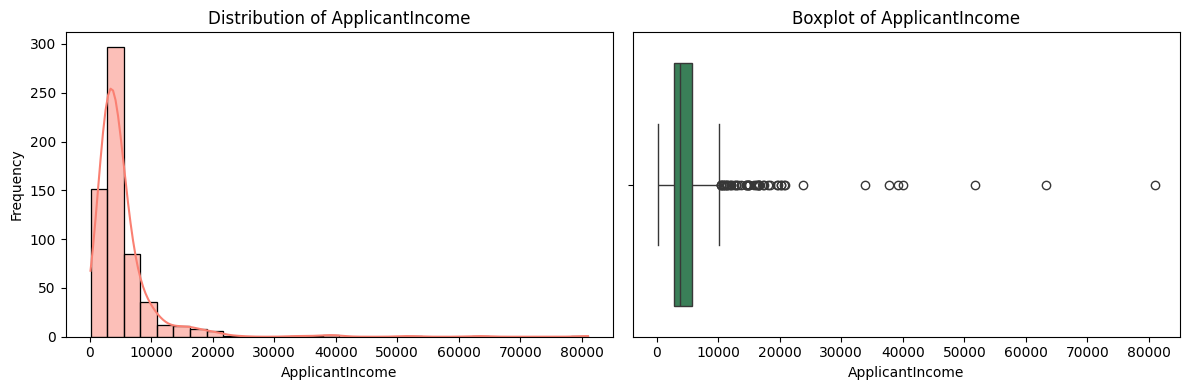


Feature: CoapplicantIncome
       CoapplicantIncome
count         614.000000
mean         1621.245798
std          2926.248369
min             0.000000
25%             0.000000
50%          1188.500000
75%          2297.250000
max         41667.000000
Missing values: 0 (0.00%)
Unique categories: 287

Skewness: 7.492
Kurtosis: 84.956

CoapplicantIncome is strongly skewed. Consider log, Box-Cox, or Yeo-Johnson transformation.
CoapplicantIncome shows heavy tails (leptokurtic). Consider robust scaling or outlier treatment.

 The variable is both skewed and heavy-tailed. Consider both transformation and outlier treatment.


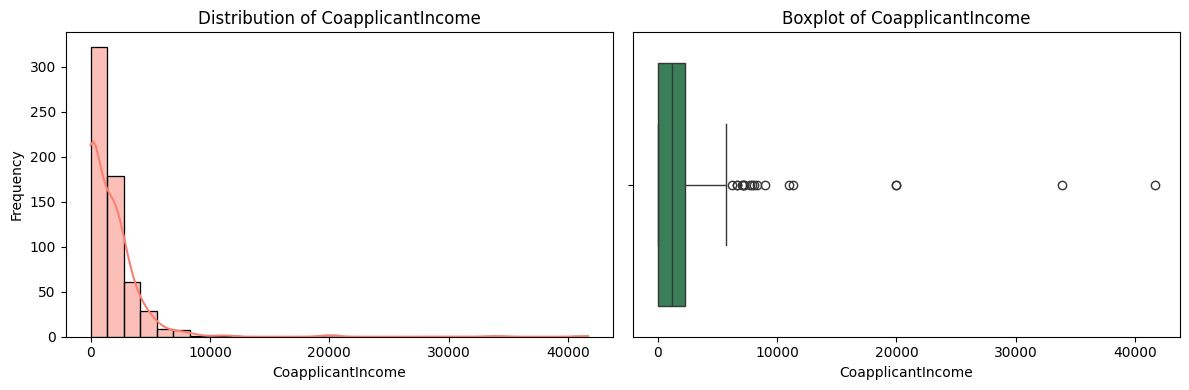


Feature: LoanAmount
       LoanAmount
count  592.000000
mean   146.412162
std     85.587325
min      9.000000
25%    100.000000
50%    128.000000
75%    168.000000
max    700.000000
Missing values: 22 (3.58%)
Unique categories: 203

Skewness: 2.678
Kurtosis: 10.402

LoanAmount is strongly skewed. Consider log, Box-Cox, or Yeo-Johnson transformation.
LoanAmount shows heavy tails (leptokurtic). Consider robust scaling or outlier treatment.

 The variable is both skewed and heavy-tailed. Consider both transformation and outlier treatment.


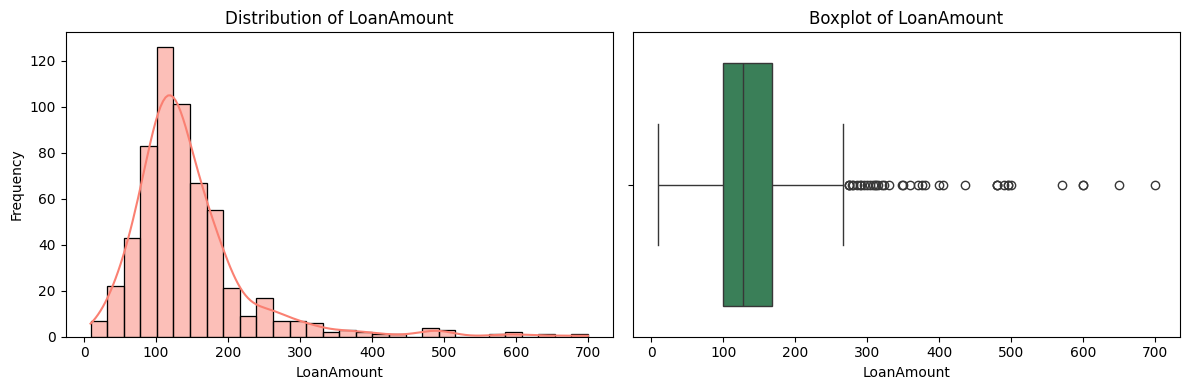


Feature: Loan_Amount_Term
       Loan_Amount_Term
count         600.00000
mean          342.00000
std            65.12041
min            12.00000
25%           360.00000
50%           360.00000
75%           360.00000
max           480.00000
Missing values: 14 (2.28%)
Unique categories: 10

Skewness: -2.362
Kurtosis: 6.673

Loan_Amount_Term is strongly skewed. Consider log, Box-Cox, or Yeo-Johnson transformation.
Loan_Amount_Term shows heavy tails (leptokurtic). Consider robust scaling or outlier treatment.

 The variable is both skewed and heavy-tailed. Consider both transformation and outlier treatment.


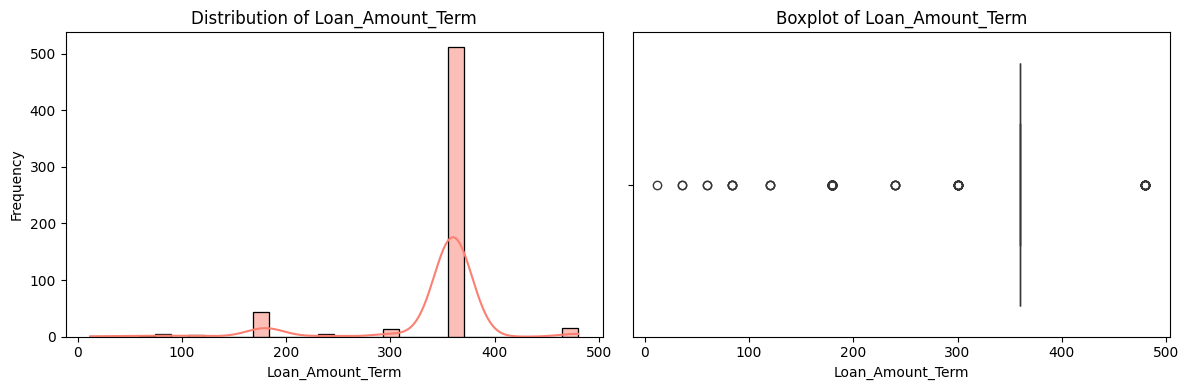


Feature: Credit_History
       Credit_History
count      564.000000
mean         0.842199
std          0.364878
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Missing values: 50 (8.14%)
Unique categories: 2

Skewness: -1.882
Kurtosis: 1.549

Credit_History is strongly skewed. Consider log, Box-Cox, or Yeo-Johnson transformation.
Credit_History shows heavy tails (leptokurtic). Consider robust scaling or outlier treatment.

 The variable is both skewed and heavy-tailed. Consider both transformation and outlier treatment.


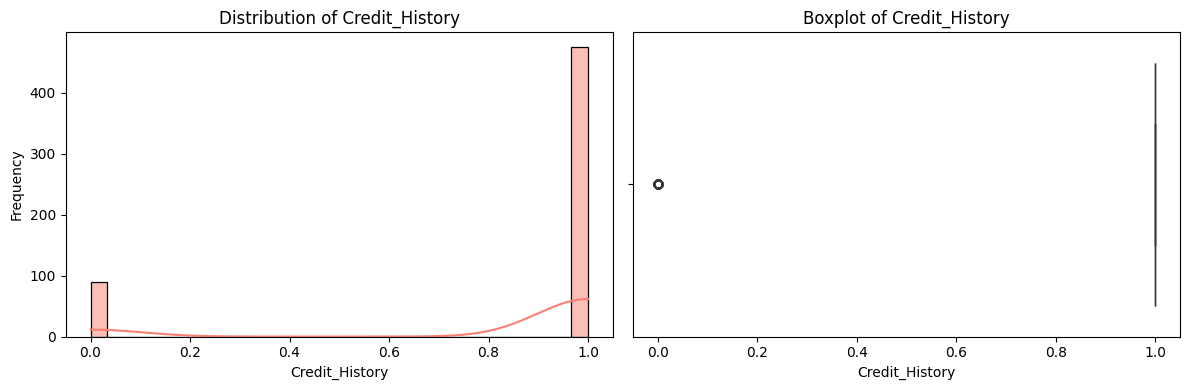

In [19]:
# We can loop to save time
for col in numerical_features:
    univariate_numerical_eda(df1, col)

In [20]:
# Prints and returns all categorical columns in the DataFrame.
categorical_features = df1.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical Features:\n{categorical_features}")


Categorical Features:
['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [21]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def univariate_categorical_eda(df1, column, save_folder="EDA_Categorical_Charts"):
    """
    Performs univariate EDA on a single categorical column.
    Displays frequency distribution, proportion, missing values,
    and visualizations (bar plot + pie chart).
    Automatically saves each plot to a folder.
    Provides ML preprocessing suggestions.
    """

    # Create folder if it doesn’t exist
    if not os.path.exists(save_folder):
        os.makedirs(save_folder)

    print(f"\nFeature: {column}")
    print("="*45)

    # --- Summary ---
    total = len(df1[column])
    missing = df1[column].isna().sum()
    unique = df1[column].nunique()
    mode_val = df1[column].mode()[0] if unique > 0 else None

    print(f"Total observations: {total}")
    print(f"Missing values: {missing} ({(missing/total)*100:.2f}%)")
    print(f"Unique categories: {unique}")
    print(f"Most frequent category: {mode_val}")

    # --- Frequency Table ---
    freq = df1[column].value_counts(dropna=False)
    perc = df1[column].value_counts(normalize=True, dropna=False) * 100
    summary = pd.DataFrame({'Count': freq, 'Percentage': perc.round(2)})
    print("\nCategory Distribution:")
    print(summary)

    # --- Visualization ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Bar Plot
    sns.countplot(x=df1[column], palette='Set2', order=freq.index, ax=axes[0])
    axes[0].set_title(f"Frequency of {column}", fontsize=13)
    axes[0].set_xlabel(column)
    axes[0].set_ylabel("Count")
    axes[0].tick_params(axis='x', rotation=30)

    # Pie Chart
    axes[1].pie(freq, labels=freq.index, autopct='%1.1f%%', startangle=90)
    axes[1].set_title(f"Proportion of {column}", fontsize=13)

    plt.tight_layout()

    # --- Save Chart ---
    save_path = os.path.join(save_folder, f"{column}_categorical_plot.png")
    plt.savefig(save_path, bbox_inches='tight', dpi=300)
    print(f"Saved plot for '{column}' → {save_path}")

    # Optional: show inline
    plt.show()

    plt.close(fig)

    # --- ML Preprocessing Suggestions ---
    if unique == 2:
        print(f" {column} is binary — suitable for Label Encoding (0/1).")
    elif 2 < unique <= 10:
        print(f" {column} has moderate categories — use One-Hot Encoding.")
    elif unique > 10:
        print(f" {column} has many unique categories — consider frequency encoding or feature grouping.")
    else:
        print(f" {column} seems low cardinality — standard encoding should work fine.")

    if (missing / total) > 0.05:
        print(f" Missing values exceed 5% — consider imputing or flagging missingness.")



Feature: Gender
Total observations: 614
Missing values: 13 (2.12%)
Unique categories: 2
Most frequent category: Male

Category Distribution:
        Count  Percentage
Gender                   
Male      489       79.64
Female    112       18.24
NaN        13        2.12


C:\Users\ncc777\AppData\Local\Temp\ipykernel_8172\2901242083.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df1[column], palette='Set2', order=freq.index, ax=axes[0])


Saved plot for 'Gender' → EDA_Categorical_Charts\Gender_categorical_plot.png


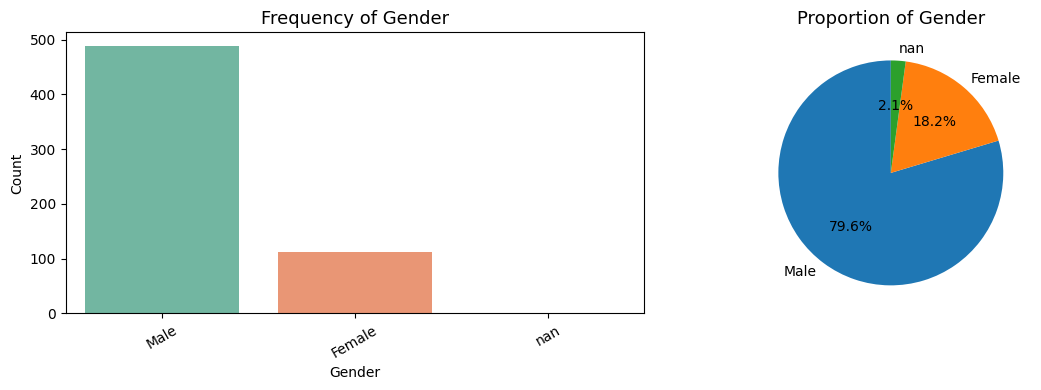

 Gender is binary — suitable for Label Encoding (0/1).

Feature: Married
Total observations: 614
Missing values: 3 (0.49%)
Unique categories: 2
Most frequent category: Yes

Category Distribution:
         Count  Percentage
Married                   
Yes        398       64.82
No         213       34.69
NaN          3        0.49


C:\Users\ncc777\AppData\Local\Temp\ipykernel_8172\2901242083.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df1[column], palette='Set2', order=freq.index, ax=axes[0])


Saved plot for 'Married' → EDA_Categorical_Charts\Married_categorical_plot.png


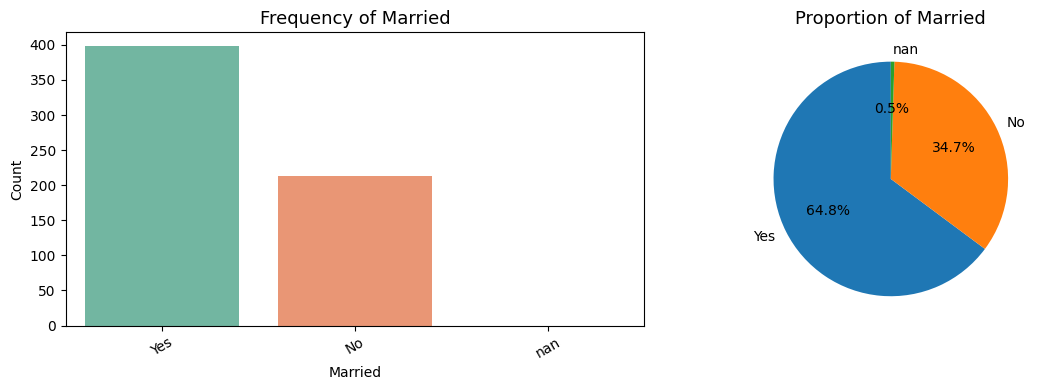

 Married is binary — suitable for Label Encoding (0/1).

Feature: Dependents
Total observations: 614
Missing values: 15 (2.44%)
Unique categories: 4
Most frequent category: 0

Category Distribution:
            Count  Percentage
Dependents                   
0             345       56.19
1             102       16.61
2             101       16.45
3+             51        8.31
NaN            15        2.44


C:\Users\ncc777\AppData\Local\Temp\ipykernel_8172\2901242083.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df1[column], palette='Set2', order=freq.index, ax=axes[0])


Saved plot for 'Dependents' → EDA_Categorical_Charts\Dependents_categorical_plot.png


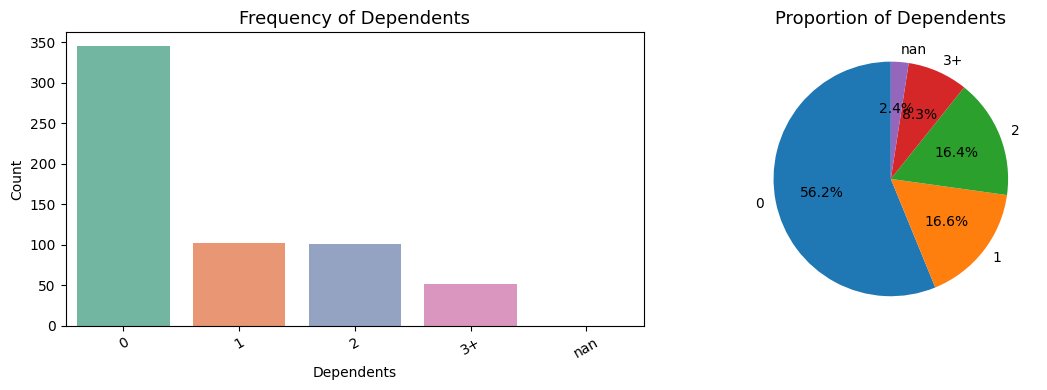

 Dependents has moderate categories — use One-Hot Encoding.

Feature: Education
Total observations: 614
Missing values: 0 (0.00%)
Unique categories: 2
Most frequent category: Graduate

Category Distribution:
              Count  Percentage
Education                      
Graduate        480       78.18
Not Graduate    134       21.82


C:\Users\ncc777\AppData\Local\Temp\ipykernel_8172\2901242083.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df1[column], palette='Set2', order=freq.index, ax=axes[0])


Saved plot for 'Education' → EDA_Categorical_Charts\Education_categorical_plot.png


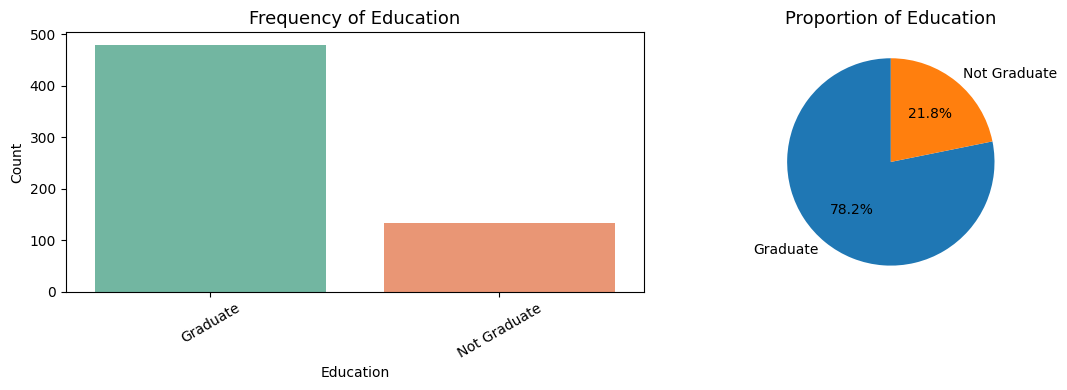

 Education is binary — suitable for Label Encoding (0/1).

Feature: Self_Employed
Total observations: 614
Missing values: 32 (5.21%)
Unique categories: 2
Most frequent category: No

Category Distribution:
               Count  Percentage
Self_Employed                   
No               500       81.43
Yes               82       13.36
NaN               32        5.21


C:\Users\ncc777\AppData\Local\Temp\ipykernel_8172\2901242083.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df1[column], palette='Set2', order=freq.index, ax=axes[0])


Saved plot for 'Self_Employed' → EDA_Categorical_Charts\Self_Employed_categorical_plot.png


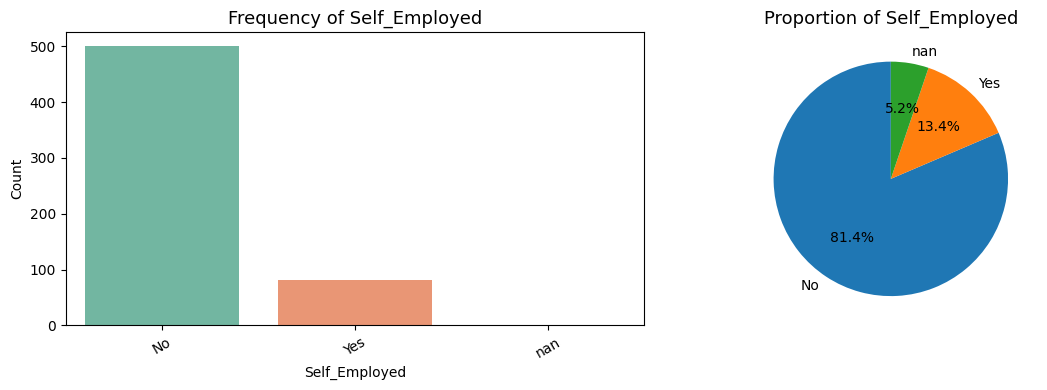

 Self_Employed is binary — suitable for Label Encoding (0/1).
 Missing values exceed 5% — consider imputing or flagging missingness.

Feature: Property_Area
Total observations: 614
Missing values: 0 (0.00%)
Unique categories: 3
Most frequent category: Semiurban

Category Distribution:
               Count  Percentage
Property_Area                   
Semiurban        233       37.95
Urban            202       32.90
Rural            179       29.15


C:\Users\ncc777\AppData\Local\Temp\ipykernel_8172\2901242083.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df1[column], palette='Set2', order=freq.index, ax=axes[0])


Saved plot for 'Property_Area' → EDA_Categorical_Charts\Property_Area_categorical_plot.png


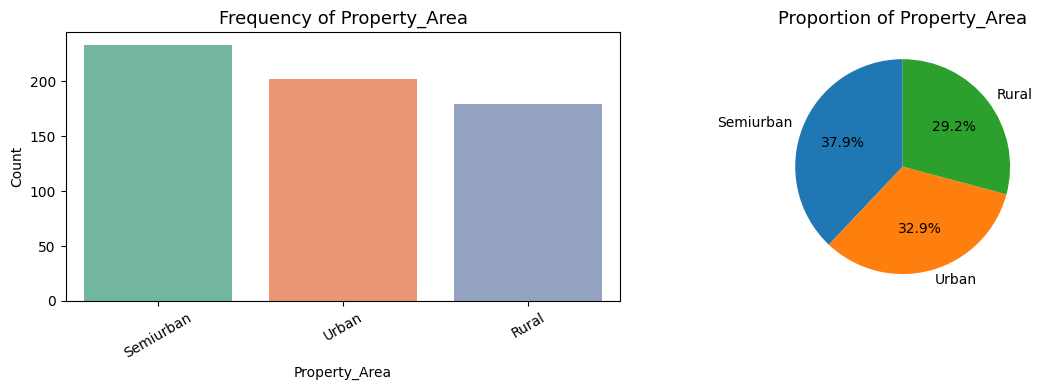

 Property_Area has moderate categories — use One-Hot Encoding.

Feature: Loan_Status
Total observations: 614
Missing values: 0 (0.00%)
Unique categories: 2
Most frequent category: Y

Category Distribution:
             Count  Percentage
Loan_Status                   
Y              422       68.73
N              192       31.27


C:\Users\ncc777\AppData\Local\Temp\ipykernel_8172\2901242083.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df1[column], palette='Set2', order=freq.index, ax=axes[0])


Saved plot for 'Loan_Status' → EDA_Categorical_Charts\Loan_Status_categorical_plot.png


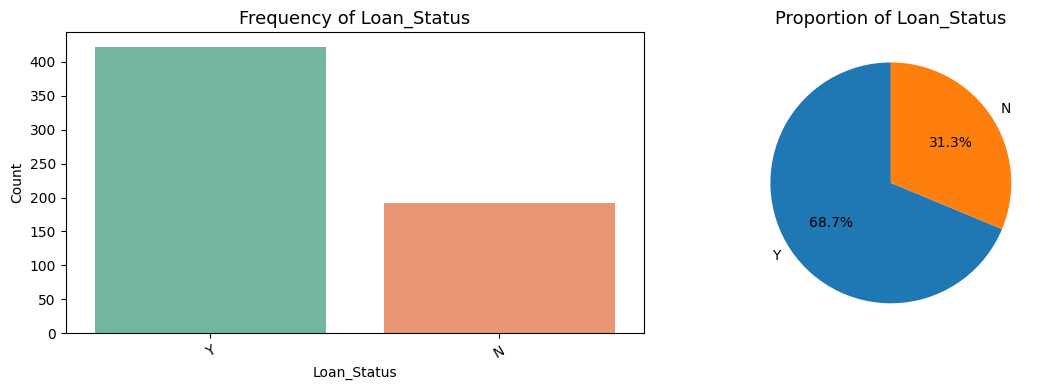

 Loan_Status is binary — suitable for Label Encoding (0/1).


In [22]:
# We can loop to save time
for col in categorical_features:
    univariate_categorical_eda(df1, col)

----------------------------------------------------------------
 ### **2. Bivariate analysis**
 ---------------------------------------------------------------

1. Numeric to Numeric

Cross Tabulation

In [23]:
for col in categorical_features:  # Exclude Loan_Status
        print(f"\nCross-tabulation: Loan_Status vs {col}")
        print(pd.crosstab(df1[col], df1['Loan_Status'], normalize='index'))


Cross-tabulation: Loan_Status vs Gender
Loan_Status         N         Y
Gender                         
Female       0.330357  0.669643
Male         0.306748  0.693252

Cross-tabulation: Loan_Status vs Married
Loan_Status         N         Y
Married                        
No           0.370892  0.629108
Yes          0.283920  0.716080

Cross-tabulation: Loan_Status vs Dependents
Loan_Status         N         Y
Dependents                     
0            0.310145  0.689855
1            0.352941  0.647059
2            0.247525  0.752475
3+           0.352941  0.647059

Cross-tabulation: Loan_Status vs Education
Loan_Status          N         Y
Education                       
Graduate      0.291667  0.708333
Not Graduate  0.388060  0.611940

Cross-tabulation: Loan_Status vs Self_Employed
Loan_Status           N         Y
Self_Employed                    
No             0.314000  0.686000
Yes            0.317073  0.682927

Cross-tabulation: Loan_Status vs Property_Area
Loan_Status     

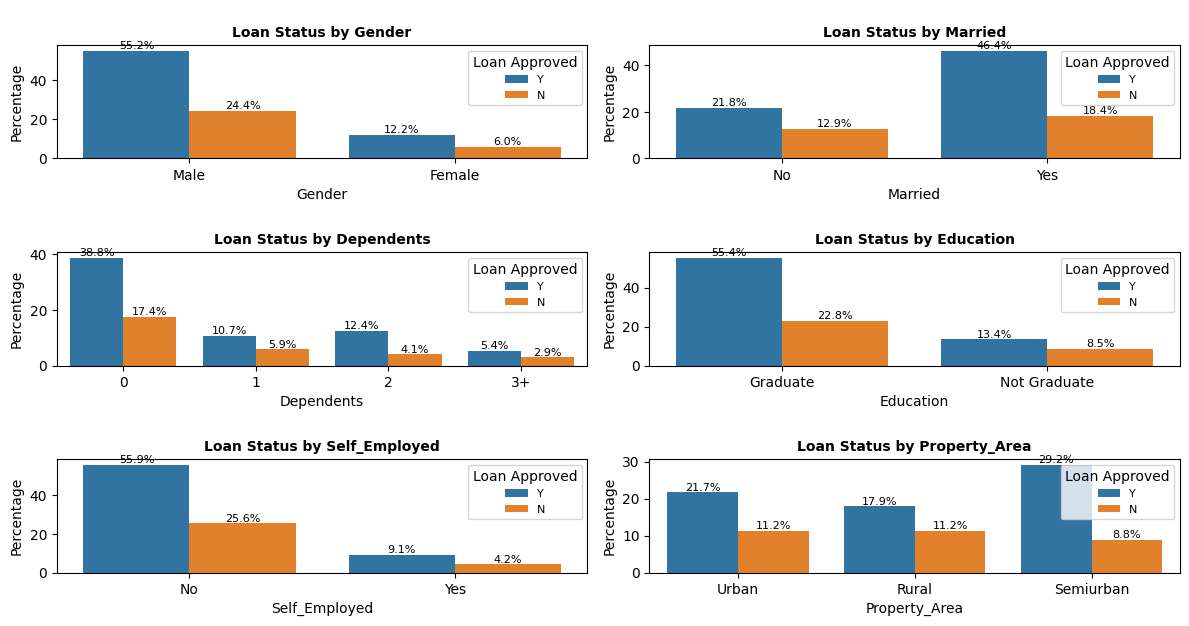

In [24]:
# #  let plot bar chart to visualize it (with percentage labelled)
plt.figure(figsize=(12,8))

for i, col in enumerate( categorical_features[:-1], start=1):
    plt.subplot(4,2,i)
    ax = sns.countplot(data=df1, x=col, hue='Loan_Status', stat='percent')

    # Add percentage labels on bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=8)

    plt.title(f'\nLoan Status by {col}', fontsize=10, fontweight='bold')
    plt.ylabel('Percentage')
    plt.xlabel(col)
    plt.legend(title='Loan Approved', fontsize=8)
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

Saved cross-tab visualization → EDA_CrossTab_Plots\LoanStatus_vs_CategoricalFeatures.png


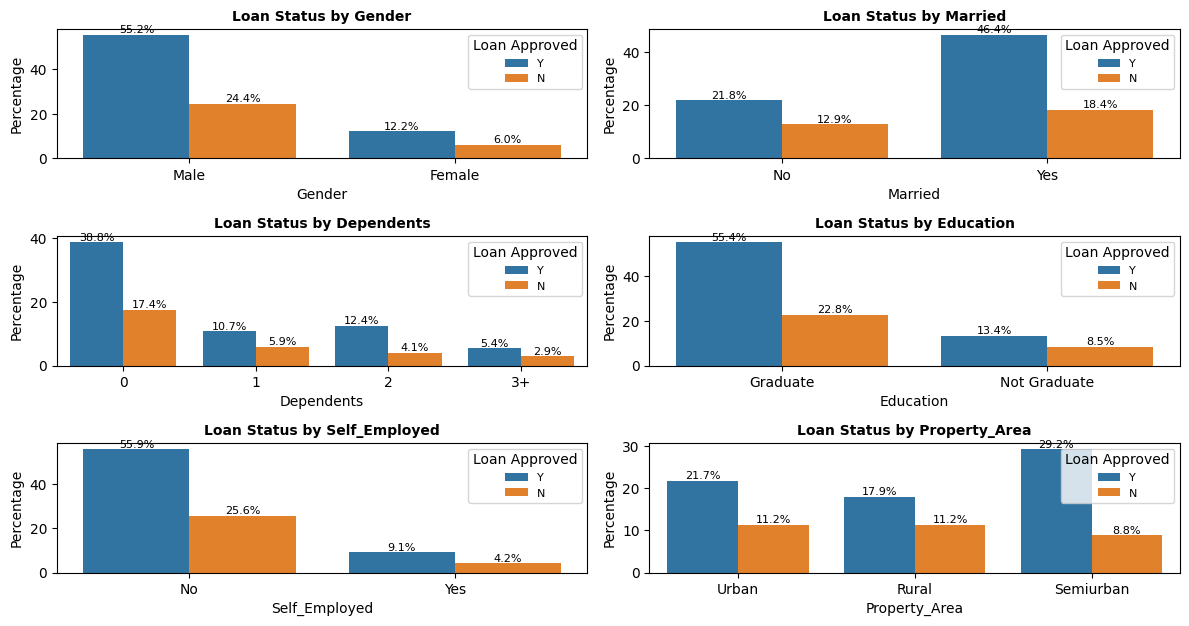

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Create folder to store the saved plot (optional but clean)
save_folder = "EDA_CrossTab_Plots"
if not os.path.exists(save_folder):
    os.makedirs(save_folder)

# Create the figure
plt.figure(figsize=(12, 8))

# Loop through categorical features (excluding target)
for i, col in enumerate(categorical_features[:-1], start=1):
    plt.subplot(4, 2, i)
    ax = sns.countplot(data=df1, x=col, hue='Loan_Status', stat='percent')

    # Add percentage labels on bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=8)

    plt.title(f'Loan Status by {col}', fontsize=10, fontweight='bold')
    plt.ylabel('Percentage')
    plt.xlabel(col)
    plt.legend(title='Loan Approved', fontsize=8)
    plt.xticks(rotation=0)

# Tight layout for clean spacing
plt.tight_layout()

# Define save path
save_path = os.path.join(save_folder, "LoanStatus_vs_CategoricalFeatures.png")

# Save the combined figure
plt.savefig(save_path, bbox_inches='tight', dpi=300)
print(f"Saved cross-tab visualization → {save_path}")

# Optional: show inline
plt.show()

# Close figure (good practice when looping)
plt.close()


Correlation with target

In [26]:
def map_Loan_status(x):
    if x == 'Y':
        return 1
    elif x == 'N':
        return 0
    else:
        return 'Missing record'

# lets apply our function
df1['Loan_Status'] = df1['Loan_Status'].apply(map_Loan_status)

In [27]:
# Lets find the numerical features
num_features = df1.select_dtypes(include=['int64', 'float64']).columns

# convert to dataframe
num_features = pd.DataFrame(df1[num_features])
num_features.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,5849,0.0,NaN,360.0,1.0,1
1,4583,1508.0,128.0,360.0,1.0,0


In [28]:
def correlation_with_target(df1_cleaned, target_col, figsize=(10,2)):
    """
    Plots a heatmap showing correlation of each numeric feature against target_col.
    Returns a Series of correlations (sorted by absolute magnitude).
    """
    # Keep only numeric columns
    #numeric_df = df1.select_dtypes(include='number').copy()
    #numeric_df = df1.select_dtypes(include=['int64', 'float64']).columns
    #num_features
    if target_col not in num_features.columns:
        raise ValueError(f"Target column '{target_col}' must be numeric and present in the dataframe.")

    # compute correlations of every numeric column with the target
    corrs = num_features.corrwith(num_features[target_col]).drop(target_col)

    corrs_df = corrs.to_frame(name='corr').T  # shape (1, n)
    

    plt.figure(figsize=figsize)
    sns.heatmap(
        corrs_df,
        annot=True,
        fmt=".3f",
        cmap="coolwarm",
        center=0,
        vmin=-1,
        vmax=1,
        cbar_kws={'orientation': 'vertical', 'shrink':0.7}
    )
    plt.xticks(rotation=45, ha='right')
    plt.yticks([0], [target_col], rotation=0)
    plt.title(f'Correlation of numeric features with {target_col}', fontsize=12)
    plt.tight_layout()
    plt.show()

    # return sorted correlations for downstream use
    return corrs.reindex(corrs.abs().sort_values(ascending=False).index)


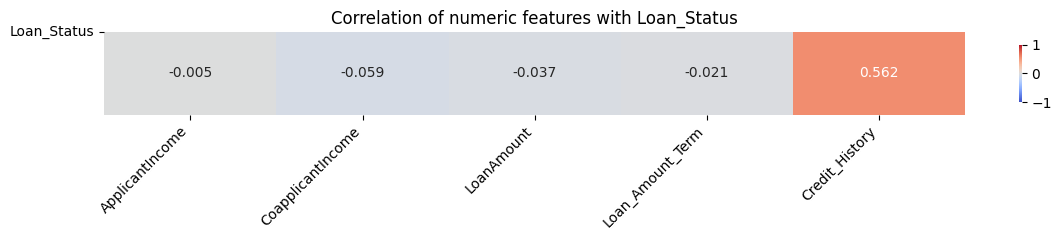

Credit_History       0.561678
CoapplicantIncome   -0.059187
LoanAmount          -0.037318
Loan_Amount_Term    -0.021268
ApplicantIncome     -0.004710
dtype: float64


In [29]:
corr_series = correlation_with_target(df1, 'Loan_Status', figsize=(12,2.5))
print(corr_series) 


Text(0.5, 1.0, 'Correlation Matrix')

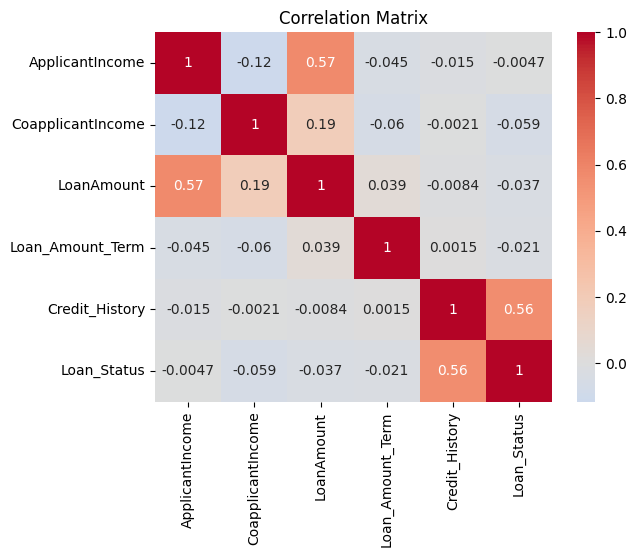

In [30]:
corr = num_features.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
#plt.show()


**Numeric–Categorical (Feature vs Target)**

In [31]:
def bivariate_num_cat(df1, feature, target='quality_label'):
    """
    Plots and summarizes relationship between a numerical feature and a categorical target.
    """
    print(f" Feature: {feature} vs {target}")
    print("="*50)

    # Group summary
    summary = df1.groupby(target)[feature].describe()[['mean','std','min','max']]
    print(summary)
    print()

    plt.figure(figsize=(10,5))

    # Boxplot + mean line
    sns.boxplot(x=target, y=feature, data=df1, palette='Set2')
    plt.title(f'{feature} across {target} categories', fontsize=13)
    plt.xlabel(target)
    plt.ylabel(feature)
    #plt.show()

    # Violin plot for distribution shape
    # plt.figure(figsize=(10,5))
    # sns.violinplot(x=target, y=feature, data=df1, palette='Set3')
    # plt.title(f'{feature} distribution by {target}', fontsize=13)
    # plt.xlabel(target)
    # plt.ylabel(feature)
    # plt.show()


In [32]:
df1.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

 Feature: CoapplicantIncome vs Loan_Status
                    mean          std  min      max
Loan_Status                                        
0            1877.807292  4384.060103  0.0  41667.0
1            1504.516398  1924.754855  0.0  20000.0



C:\Users\ncc777\AppData\Local\Temp\ipykernel_8172\2122381393.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df1, palette='Set2')


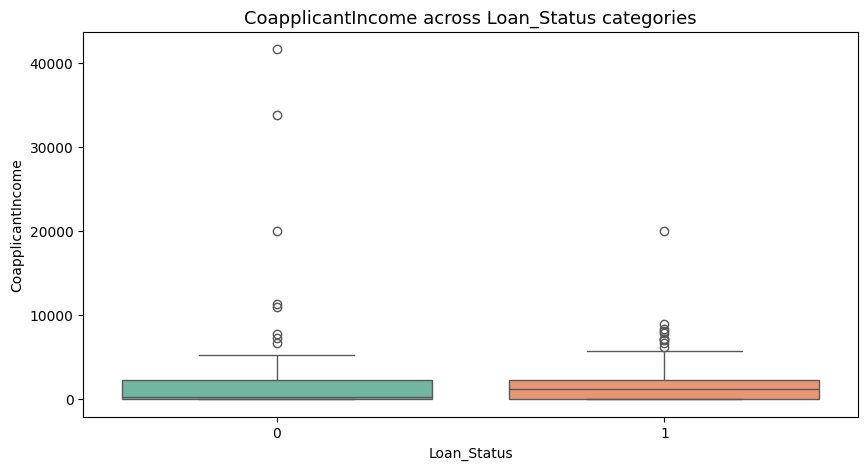

In [33]:
bivariate_num_cat(df1, "CoapplicantIncome", target='Loan_Status')

C:\Users\ncc777\AppData\Local\Temp\ipykernel_8172\2122381393.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df1, palette='Set2')


 Feature: CoapplicantIncome vs Loan_Status
                    mean          std  min      max
Loan_Status                                        
0            1877.807292  4384.060103  0.0  41667.0
1            1504.516398  1924.754855  0.0  20000.0



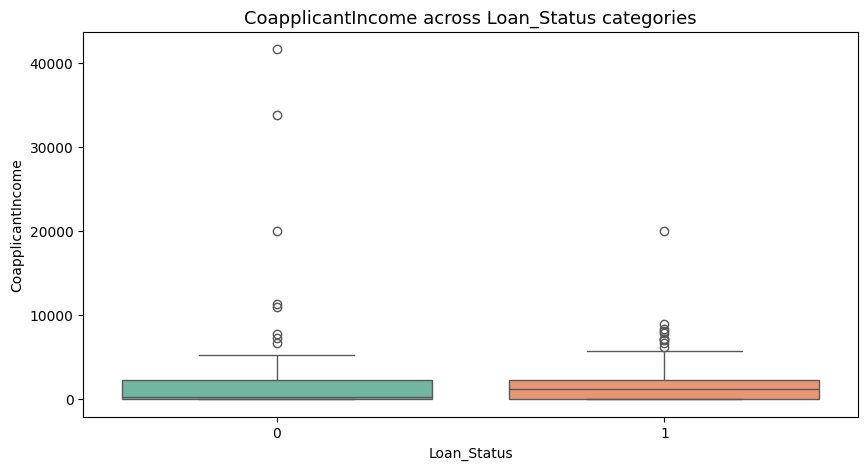

In [34]:
bivariate_num_cat(df1, "CoapplicantIncome", target='Loan_Status')

In [35]:
from scipy.stats import pearsonr

def numeric_bivariate_plot(df1, x_col, y_col):
    """
    Plots the relationship between two numeric variables with a regression line
    and displays the correlation coefficient.

    Parameters:
    -----------
    df : pandas.DataFrame
        Dataset containing the numeric columns
    x_col : str
        Name of the first numeric variable (x-axis)
    y_col : str
        Name of the second numeric variable (y-axis)
    """

    # Calculate correlation coefficient
    corr, p_value = pearsonr(df1[x_col], df1[y_col])

    # Create plot
    plt.figure(figsize=(8, 5))
    sns.regplot(data=df1, x=x_col, y=y_col, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    
    # Title and labels
    plt.title(f"{y_col} vs {x_col}\nCorrelation: {corr:.3f} (p={p_value:.3f})", fontsize=13)
    plt.xlabel(x_col, fontsize=11)
    plt.ylabel(y_col, fontsize=11)
    plt.grid(alpha=0.3)
    #plt.show()


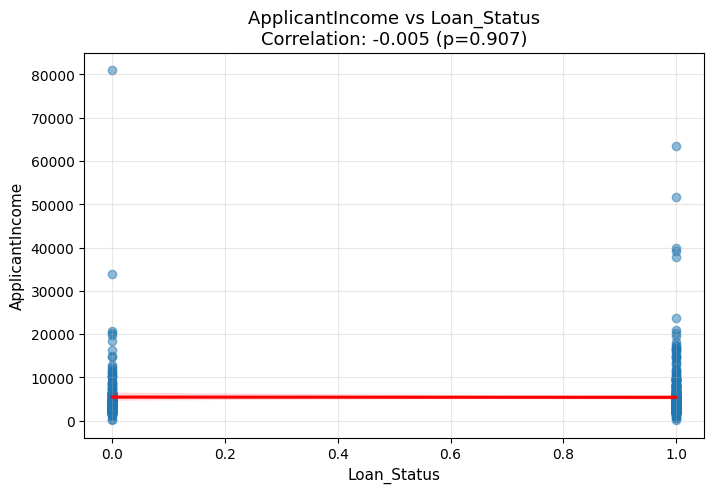

In [36]:
numeric_bivariate_plot(df1, 'Loan_Status', 'ApplicantIncome')

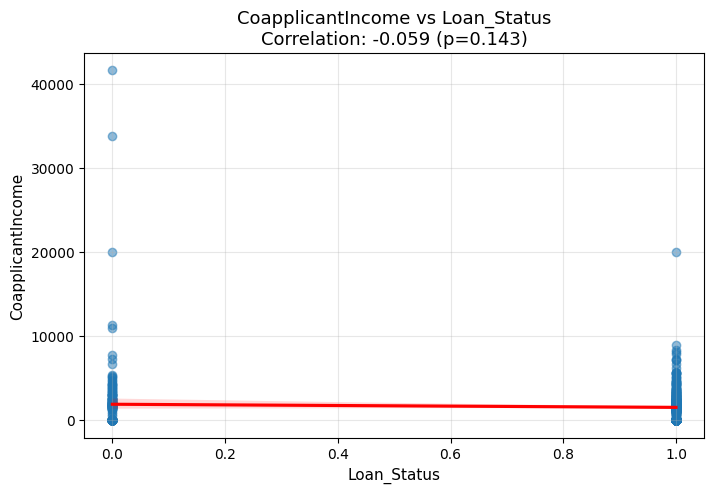

In [37]:
numeric_bivariate_plot(df1, 'Loan_Status', 'CoapplicantIncome')

 ###  Trivariate analysis

In [38]:
def trivariate_plot(df1, x_col, y_col, hue_col):
    """
    Visualizes the relationship between two numeric variables
    with a third categorical variable shown by color (hue).
    
    Parameters
    ----------
    df : pandas.DataFrame
        The dataset.
    x_col : str
        The first numeric feature (x-axis).
    y_col : str
        The second numeric feature (y-axis).
    hue_col : str
        The categorical feature (color grouping).
    """

    plt.figure(figsize=(8, 6))
    sns.lmplot(
        data=df1, 
        x=x_col, 
        y=y_col, 
        hue=hue_col, 
        height=6, 
        aspect=1.2, 
        scatter_kws={'alpha':0.6}, 
        line_kws={'linewidth':2}
    )
    plt.title(f"{y_col} vs {x_col} by {hue_col}", fontsize=13)
    plt.xlabel(x_col, fontsize=11)
    plt.ylabel(y_col, fontsize=11)
    plt.grid(alpha=0.3)
    #plt.show()


In [39]:
num_features.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status'],
      dtype='object')

<Figure size 800x600 with 0 Axes>

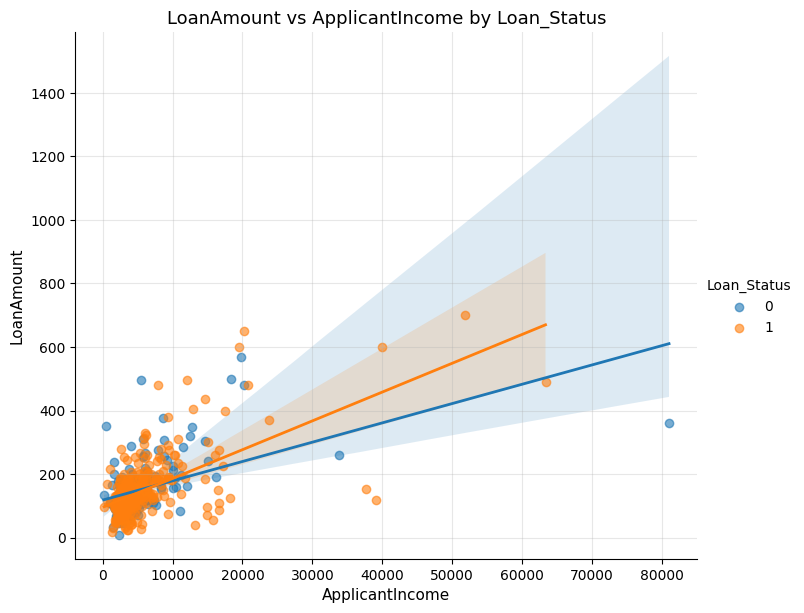

In [40]:
trivariate_plot(df1, 'ApplicantIncome', 'LoanAmount', 'Loan_Status')

<Figure size 800x600 with 0 Axes>

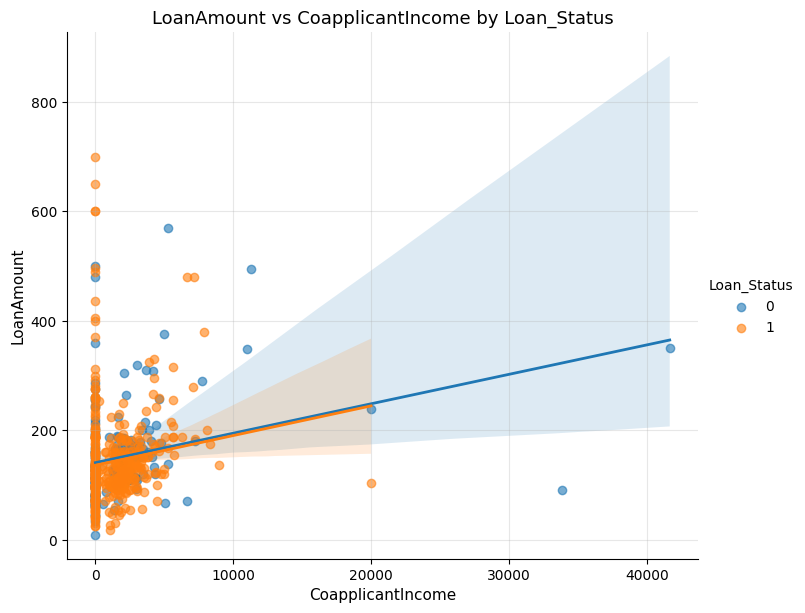

In [41]:
trivariate_plot(df1, 'CoapplicantIncome', 'LoanAmount', 'Loan_Status')

<Figure size 800x600 with 0 Axes>

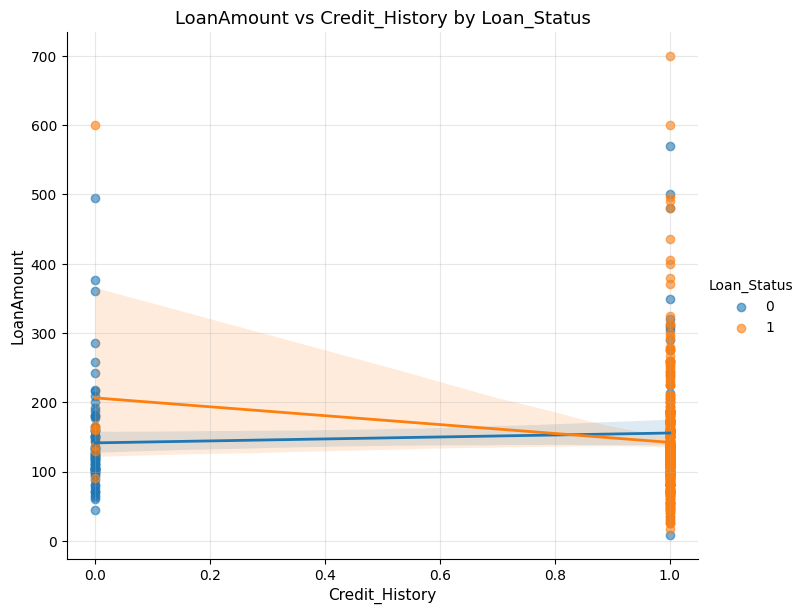

In [42]:
trivariate_plot(df1, 'Credit_History', 'LoanAmount', 'Loan_Status')

In [43]:
def grouped_summary(df):
    """
    Computes summary statistics grouped by wine quality.
    """
    summary = df1.groupby('Loan_Status').mean(numeric_only=True).round(2)
    return summary


In [44]:
grouped_summary(num_features)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
0,5446.08,1877.81,151.22,344.06,0.54
1,5384.07,1504.52,144.29,341.07,0.98
